In [1]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import scipy.stats
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('../peptidome.mplstyle')

import sys
sys.path.append('..')
from lib import *

In [2]:
df = load_proteome_as_df('Human')
print('complete length', '%e'%np.sum(df['Sequence'].str.len()))
print('multiple seqs', len(df['Sequence'])-len(df['Sequence'].unique()))
df.drop_duplicates(subset=['Sequence'], inplace=True)

df_clustered = load_proteome_as_df_path(datadir+'cluster/UP000005640Human_rep_seq.fasta')
print('>.9 identity', len(df)-len(df_clustered),
      '%e'%(np.sum(df['Sequence'].str.len())-np.sum(df_clustered['Sequence'].str.len())))


df_clustered_50 = load_proteome_as_df_path(datadir+'cluster/UP000005640Human_50_rep_seq.fasta')
print('>.5 identity', len(df_clustered)-len(df_clustered_50),
      '%e'%(np.sum(df_clustered['Sequence'].str.len())-np.sum(df_clustered_50['Sequence'].str.len())))

complete length 1.151849e+07
multiple seqs 66
>.9 identity 1289 4.566740e+05
>.5 identity 3486 1.973860e+06


In [3]:
# uniref viruses
#df = load_unirefproteome_as_df_path(datadir + 'human-viruses-uniref90.fasta')
#print('complete length', '%e'%np.sum(df['Sequence'].str.len()))

In [4]:
def to_kmers_nonoverlapping(seqs, k):
    for seq in seqs:
         for i in range((len(seq)-k+1)//k):
                s = seq[k*i:k*(i+1)]
                if isvalidaa(s):
                    yield s

In [5]:
fragmentlength = 30
fragments = [kmer for kmer in to_kmers_nonoverlapping(df['Sequence'], fragmentlength)]
df_fragments = pd.DataFrame(dict(identifier=[str(i) for i in range(len(fragments))],
                                 Sequence=fragments))
df_fragments.drop_duplicates('Sequence', inplace=True)
fragmentlength*0.8, fragmentlength*0.8*0.5

(24.0, 12.0)

In [6]:
print('fragment length', '%e'%np.sum(df_fragments['Sequence'].str.len()))

fragment length 1.036833e+07


In [7]:
matrix_fragments = kmers_to_matrix(df_fragments['Sequence'])

In [8]:
aacounts_fragments = to_aacounts(matrix_fragments)

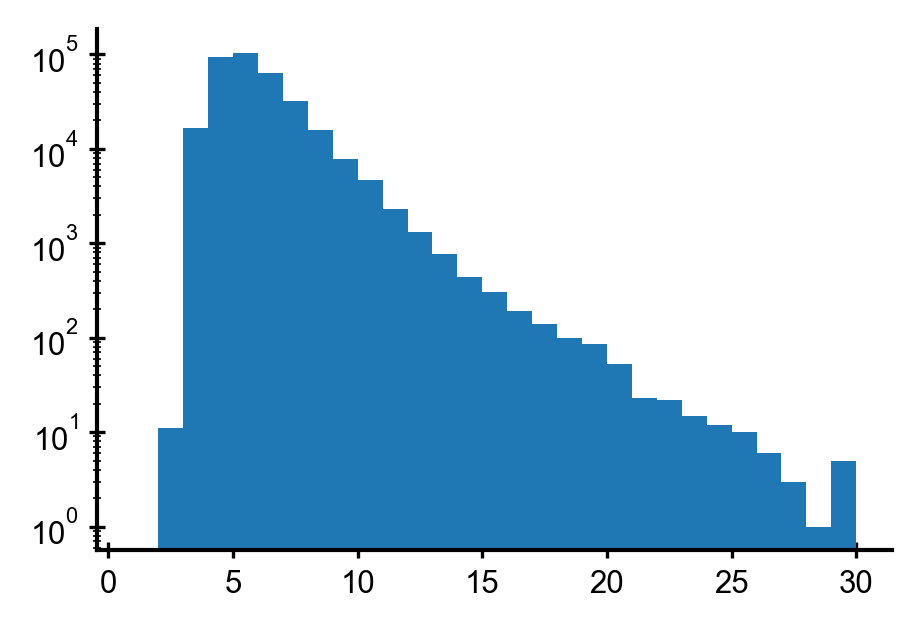

In [9]:
plt.hist(aacounts_fragments.max(axis=1), bins=np.arange(1, fragmentlength+1))
plt.yscale('log')

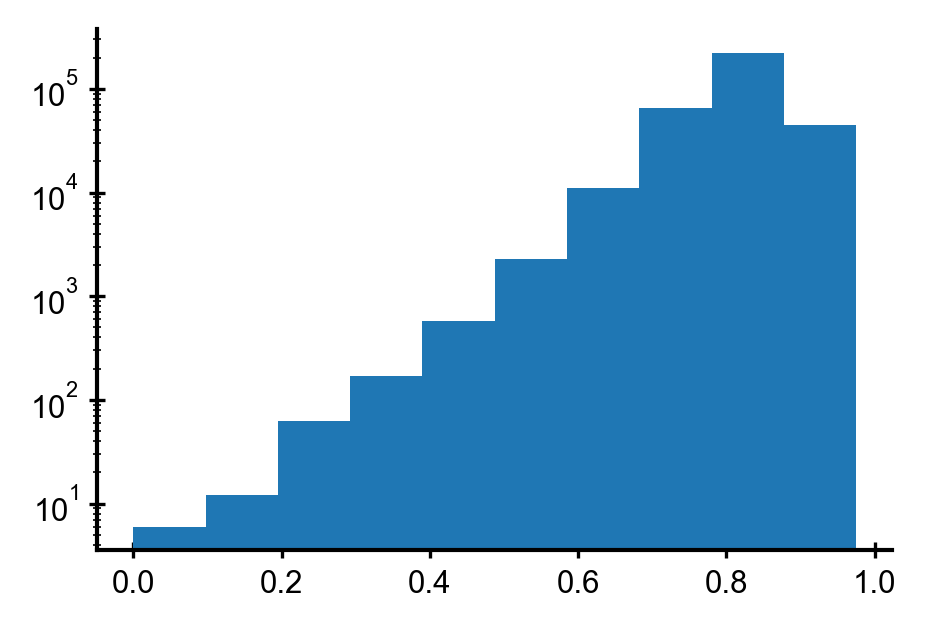

In [10]:
plt.hist(scipy.stats.entropy(aacounts_fragments/fragmentlength, axis=1, base=20))
plt.yscale('log')

In [11]:
write_fasta(df_fragments, 'fragments.fasta.gz', seqcolumn='Sequence', idcolumn='identifier')

In [12]:
!mmseqs easy-cluster fragments.fasta.gz fragments_50 tmp --min-seq-id 0.5 -c 0.8 --cov-mode 0 --comp-bias-corr 0

easy-cluster fragments.fasta.gz fragments_50 tmp --min-seq-id 0.5 -c 0.8 --cov-mode 0 --comp-bias-corr 0 

MMseqs Version:                     	12.113e3
Substitution matrix                 	nucl:nucleotide.out,aa:blosum62.out
Seed substitution matrix            	nucl:nucleotide.out,aa:VTML80.out
Sensitivity                         	4
k-mer length                        	0
k-score                             	2147483647
Alphabet size                       	nucl:5,aa:21
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.8
Coverage mode                       	0
Compositional bias                  	0
Diagonal scoring                    	true
Exact k-mer matching                	0
Mask residues                       	1
Mask lower case residues            	0
Minimum diagonal score              	15
Include i

[345522] 0s 200ms
Time for merging to input_h: 0h 0m 0s 3ms
Time for merging to input: 0h 0m 0s 7ms
Database type: Aminoacid
Time for processing: 0h 0m 0s 221ms
Tmp tmp/7888313341575019178/clu_tmp folder does not exist or is not a directory.
Create dir tmp/7888313341575019178/clu_tmp
cluster tmp/7888313341575019178/input tmp/7888313341575019178/clu tmp/7888313341575019178/clu_tmp --max-seqs 20 -c 0.8 --cov-mode 0 --comp-bias-corr 0 --spaced-kmer-mode 1 --alignment-mode 3 -e 0.001 --min-seq-id 0.5 --remove-tmp-files 1 

Set cluster sensitivity to -s 3.000000
Set cluster mode SET COVER
Set cluster iterations to 3
linclust tmp/7888313341575019178/input tmp/7888313341575019178/clu_tmp/11386871211198906062/clu_redundancy tmp/7888313341575019178/clu_tmp/11386871211198906062/linclust --cluster-mode 0 --max-iterations 1000 --similarity-type 2 --threads 8 --compressed 0 -v 3 --sub-mat nucl:nucleotide.out,aa:blosum62.out -a 0 --alignment-mode 3 --wrapped-scoring 0 -e 0.001 --min-seq-id 0.5 --min

Clustering mode: Set Cover


[=================================================================] 100.00% 306.92K 0s 27ms
Sort entries
Find missing connections
Found 399 new connections.
Reconstruct initial order


[=================================================================] 100.00% 306.92K 0s 44ms
Add missing connections
[=================================================================] 100.00% 306.92K 0s 19ms

Time for read in: 0h 0m 0s 131ms


Total time: 0h 0m 0s 171ms

Size of the sequence database: 306923
Size of the alignment database: 306923
Number of clusters: 306546

Writing results 0h 0m 0s 47ms
Time for merging to clust: 0h 0m 0s 0ms
Time for processing: 0h 0m 0s 254ms
mergeclusters tmp/7888313341575019178/input tmp/7888313341575019178/clu_tmp/11386871211198906062/clu_redundancy tmp/7888313341575019178/clu_tmp/11386871211198906062/linclust/13286277366850465692/pre_clust tmp/7888313341575019178/clu_tmp/11386871211198906062/linclust/13286277366850465692/clust --threads 8 --compressed 0 -v 3 

Clustering step 1
[=================================================================] 100.00% 306.92K 0s 50ms     
Clustering step 2
[=================================================================] 100.00% 306.55K 0s 127ms    
Write merged clustering
[=================================================================] 100.00% 345.61K 0s 187ms    
Time for merging to clu_redundancy: 0h 0m 0s 122ms
Time for processing: 0h 0m 0s 3

Process prefiltering step 1 of 1

k-mer similarity threshold: 145
Starting prefiltering scores calculation (step 1 of 1)
Query db start 1 to 298959
Target db start 1 to 298959
[=================================================================] 100.00% 298.96K 4s 521ms    

5.388852 k-mers per position
22 DB matches per sequence
0 overflows
0 queries produce too many hits (truncated result)
1 sequences passed prefiltering per query sequence
1 median result list length
0 sequences with 0 size result lists
Time for merging to pref_step1: 0h 0m 0s 86ms
Time for processing: 0h 0m 6s 334ms
align tmp/7888313341575019178/clu_tmp/11386871211198906062/input_step1 tmp/7888313341575019178/clu_tmp/11386871211198906062/input_step1 tmp/7888313341575019178/clu_tmp/11386871211198906062/pref_step1 tmp/7888313341575019178/clu_tmp/11386871211198906062/aln_step1 --sub-mat nucl:nucleotide.out,aa:blosum62.out -a 0 --alignment-mode 3 --wrapped-scoring 0 -e 0.001 --min-seq-id 0.5 --min-aln-len 0 --seq-id-mode 

[=================================================================] 100.00% 345.61K 0s 324ms


Time for merging to clu: 0h 0m 0s 107ms
Time for processing: 0h 0m 0s 554ms
rmdb tmp/7888313341575019178/clu_tmp/11386871211198906062/clu_redundancy -v 3 

Time for processing: 0h 0m 0s 1ms
rmdb tmp/7888313341575019178/clu_tmp/11386871211198906062/input_step_redundancy -v 3 

Time for processing: 0h 0m 0s 0ms
rmdb tmp/7888313341575019178/clu_tmp/11386871211198906062/pref_step0 -v 3 

Time for processing: 0h 0m 0s 1ms
rmdb tmp/7888313341575019178/clu_tmp/11386871211198906062/aln_step0 -v 3 

Time for processing: 0h 0m 0s 2ms
rmdb tmp/7888313341575019178/clu_tmp/11386871211198906062/clu_step0 -v 3 

Time for processing: 0h 0m 0s 1ms
rmdb tmp/7888313341575019178/clu_tmp/11386871211198906062/pref_step1 -v 3 

Time for processing: 0h 0m 0s 1ms
rmdb tmp/7888313341575019178/clu_tmp/11386871211198906062/aln_step1 -v 3 

Time for processing: 0h 0m 0s 3ms
rmdb tmp/7888313341575019178/clu_tmp/11386871211198906062/clu_step1 -v 3 

Time for processing: 0h 0m 0s 1ms
rmdb tmp/7888313341575019178/clu_

In [13]:
df_fragments_clustered = load_proteome_as_df_path('fragments_50_rep_seq.fasta',
                                                  parse_genes=False, parse_accessions=False)
print('fragment clustered length', '%e'%np.sum(df_fragments_clustered['Sequence'].str.len()))

fragment clustered length 8.720010e+06


In [14]:
def counter_to_series(counter):
    count_df = pd.DataFrame.from_dict(counter, orient='index', columns=['count'])
    count_series = count_df.T.squeeze()
    return count_series
def fraction_multiple(series):
    return np.sum(series[series>1])/np.sum(series)

In [15]:
k = 9
filterlength = 12

In [ ]:
for d in [df,
          df_clustered, df_clustered_50,
          df_fragments_clustered]:
    count_series = counter_to_series(count_kmers_iterable(d['Sequence'], k, clean=True))
    count_series_unique = counter_to_series(
                       count_kmers_iterable(
                           filter_unique(d['Sequence'], k, filterlength),
                           k)
                       )
    print(fraction_multiple(count_series), fraction_multiple(count_series_unique))

0.1306002329393046 0.03224968388851347
0.08191076940880623 0.02952183266376662


In [ ]:
counts, bins, _ = plt.hist(count_series, log=True,
                           bins=np.arange(0, count_series.max()+1, 1));
plt.hist(count_series_unique, log=True, bins=bins);
#plt.xscale('log')

In [ ]:
counts = count_series

In [ ]:
2*np.sum(scipy.special.binom(counts[counts>1], 2))/np.sum(counts)**2

In [ ]:
'{:.3e}, {:.3e}'.format(np.sum(count_series), np.sum(count_series_unique))

In [ ]:
count_series.sort_values().tail(50)

In [ ]:
count_series_unique.sort_values().tail(20)